# Métodos Estocásticos I: Procesos aleatorios

* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

<div>
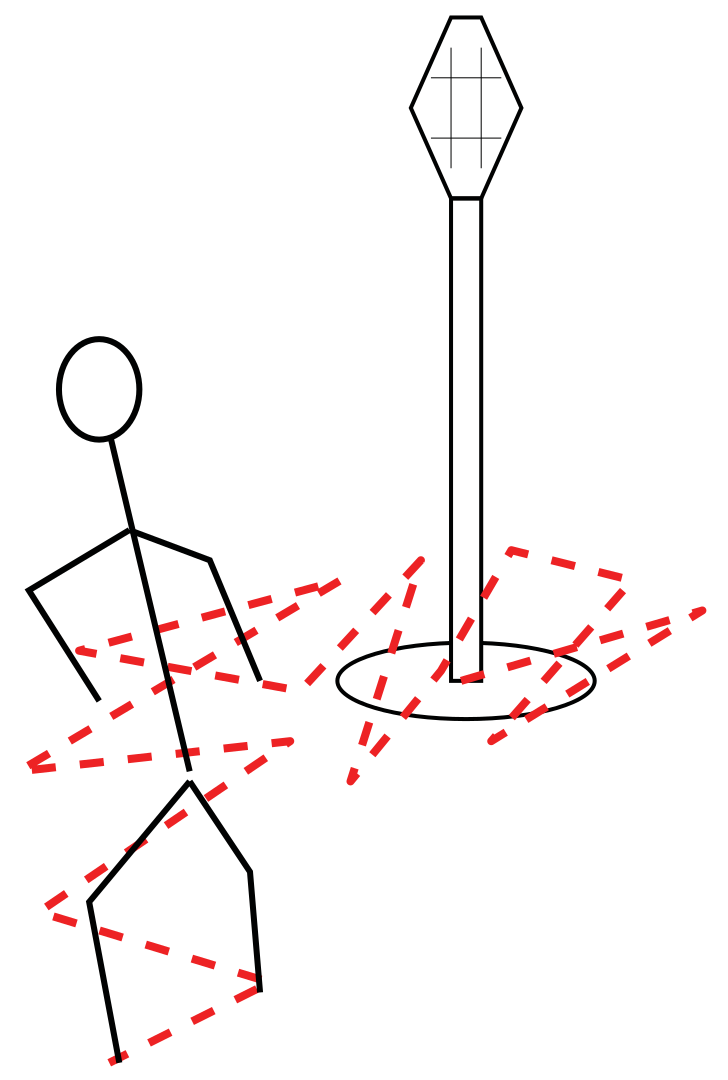
</div>

## Simulación de procesos aleatorios (Giordano $\S$ 7.1)

- Muchos fenómenos son _deterministas_, es decir, se pueden modelar a través de una ecuación diferencial. Por ejemplo: movimiento de proyectiles o el potencial eléctrico de una distribución de carga.
- Otros procesos relevantes de la naturaleza tienen un componente _aleatorio_ (del latín) o _estocástico_ (del griego). Ejemplo: decaimiento radiactivo.
- También hay sistemas que son deterministas en principio, pero que no pueden estudiarse de manera analítica por la gran cantidad de componentes del sistema. 
- En ese caso el gran número de interacciones entre elementos hace que el comportamiento del sistema se pueda aproximar como si fuera aleatorio. Ejemplo: el proceso de mezclado entre dos líquidos (difusión) es determinista en teoría, pero se simula de forma que cada partícula realiza una caminata aleatoria (_random walk_) en la práctica.


## Procesos aleatorios en ciencia (Klein $\S$ 10.1)

- En la naturaleza (o en el universo) se encuentran gran cantidad de fenómenos que son intrínsicamente estocásticos. Por ejemplo:

    - Decaimiento de núcleos radiactivos
    - Evolución
    - Mecánica cuántica
    - Movimiento Browniano
    - Ruido
- Se dice que los procesos son estocásticos cuando no se puede predecir un evento a partir de un evento anterior usando las mismas condiciones iniciales.
- Estos procesos pueden simularse usando como punto de partida generadores de números aleatorios.


## Aleatoriedad determinista (Landau $\S$ 5.1)

- Una secuencia de números es aleatoria si no hay una correlación entre sus elementos.
- Los números que se pueden generar en la secuencia no tienen que tener la misma probabilidad de ocurrir. 
- Si los números en la secuencia tienen la misma probabilidad de ocurrir, la secuencia es _uniforme_.
- Generalmente las secuencias de números aleatorios se asocian a una distribución de probabilidad de ocurrencia

## Generadores de números aleatorios verdaderos

- Usan fenómenos físicos para generar los números aleatorios, como ruido atmosférico o el decaimiento radiactivo
- Existen proyectos que proveen a la comunidad en general números verdaderamente aleatorios como [random.org](https://www.random.org/)
- Son ineficientes e indeterministas

## Generadores de números pseudoaleatorios
- Por su naturaleza, las computadoras tienen un comportamiento determinista, por lo tanto, no son capaces de generar números verdaderamente aleatorios, sino números _**pseudoaleatorios**_.
- Son generados usando listas predeterminadas o fórmulas matemáticas.
- Son eficientes, deterministas y periódicos.
- Bibliotecas como `numpy.random` o `random` de `python` proveen funciones generadoras de números pseudoaleatorios.
- En la mayoría de los casos prácticos se pueden usar para simular procesos estocásticos

### Generación de números aleatorios con `numpy`

In [1]:
import numpy as np

rng = np.random.default_rng()

np.random.default_rng?

In [4]:
# Generador de números aleatorios
rng = np.random.default_rng()

# Generador de números aleatorios con una semilla
semilla = 945549
rng_semilla = np.random.default_rng(semilla)

print(f'Números aleatorios:')
for i in range(5):
    a = rng.random()
    b = rng_semilla.random()
    print(f'Sin semilla: {a}, \tcon semilla: {b}')

Números aleatorios:
Sin semilla: 0.16457372948246907, 	con semilla: 0.18793121302665294
Sin semilla: 0.6997227385126512, 	con semilla: 0.8175477873753547
Sin semilla: 0.8923840242728491, 	con semilla: 0.626376563670184
Sin semilla: 0.0921270235249203, 	con semilla: 0.39237970885320317
Sin semilla: 0.5301749747152864, 	con semilla: 0.27548148057610156


In [6]:
# Generador de números aleatorios
rng = np.random.default_rng()

# Generador de números aleatorios con una semilla
semilla = 9449
rng_semilla = np.random.default_rng(semilla)

print(f'Números aleatorios:')
for i in range(5):
    a = rng.random()
    b = rng_semilla.random()
    print(f'Sin semilla: {a}, \tcon semilla: {b}')

Números aleatorios:
Sin semilla: 0.41645386094591796, 	con semilla: 0.5471704727858427
Sin semilla: 0.7847878776068725, 	con semilla: 0.0741506926389679
Sin semilla: 0.8104669545719648, 	con semilla: 0.17075204500277108
Sin semilla: 0.3291828857684428, 	con semilla: 0.019890057997492216
Sin semilla: 0.06495491972452416, 	con semilla: 0.9192290375623415


In [13]:
rng_semilla.integers(0,100,(4,4,4))b

array([[[23, 54, 16, 99],
        [66, 10, 72, 42],
        [16, 75, 66, 56],
        [13, 94, 90, 24]],

       [[24, 72, 82, 59],
        [12, 45, 44, 23],
        [53, 50, 45, 67],
        [93, 35, 98, 63]],

       [[57,  3,  0, 81],
        [40, 72, 34,  3],
        [43, 40, 95, 98],
        [54, 67, 29, 61]],

       [[53, 33, 46, 62],
        [17, 97, 61, 24],
        [96, 15, 56, 74],
        [56, 22, 36, 55]]], dtype=int64)

In [32]:
rng_semilla.random((4,4))

array([[0.0907011 , 0.93801885, 0.69080704, 0.99212739],
       [0.80896618, 0.80759479, 0.18260715, 0.96662059],
       [0.53452397, 0.12578143, 0.10616751, 0.16605537],
       [0.61991249, 0.9895757 , 0.51396434, 0.32535087]])

### Números aleatorios a partir de diferentes distribuciones

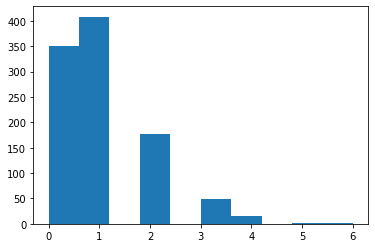

In [26]:
import matplotlib.pyplot as plt

# Generate an array of 10 numbers according to a unit Gaussian distribution.
# s = rng.standard_normal(1000)
# s = rng.exponential(size=1000)
s = rng.poisson(size=1000)

count, bins, ignored = plt.hist(s)
plt.show()

## Ejemplos de simulaciones de fenómenos estocásticos

### Decaimiento radiactivo (Newman Ejemplo 10.1)

El radioisótopo $^{208}\mathrm{Tl}$ (talio 208) decae a $^{208}\mathrm{Pb}$ (plomo 208) estable con una vida media de 3.053 minutos.

Suponga que comienza con una muestra de 1000 átomos de talio. Se simulará el decaimiento radiactivo de los átomos en el tiempo usando números aleatorios.

Un número N de átomos en la muestra de talio decaen en el tiempo como:
$$N(t) = N(0)\cdot2^{-t/\tau}$$

donde $\tau$ es la vida media.

Entonces, la fracción de átomos de talio restantes luego de un tiempo $t$ es $N(t)/N(0) = 2^{-t/\tau}$. Por lo tanto la probabilidad de que un átomo decaiga es: 
$$p(t) = 1 - 2^{-t/\tau}$$

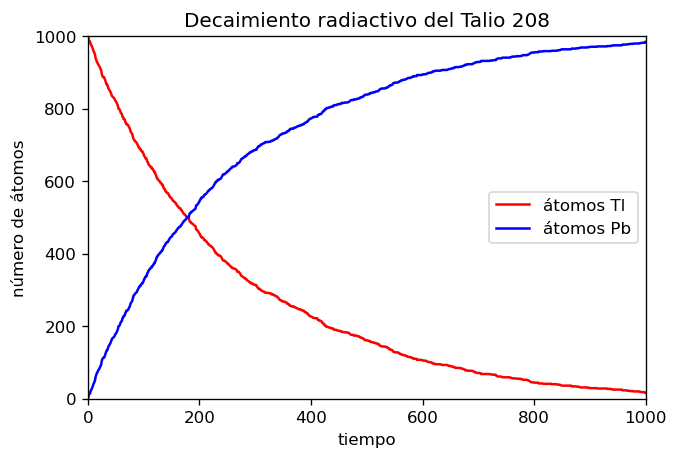

In [38]:
import matplotlib.pyplot as plt

# Generador de números aleatorios
rng = np.random.default_rng(20202)

# Constantes
nTl = 1000
nPb = 0
tau = 3.053*60
h = 1.0
p = 1 - 2**(-h/tau)
tMax = 1000

# Puntos
puntosT = np.arange(0.0, tMax, h)
puntosTl = []
puntosPb = []

# Ciclo Principal
for t in puntosT:
    puntosTl.append(nTl)
    puntosPb.append(nPb)
    
    # Cómputo del número de átomos que decaen
    decaimiento = 0
    
    for i in range(nTl):
        if rng.random() < p: # Método de Monte-Carlo
            decaimiento += 1
    # Se suma y resta la cantidad a cada conjunto
    nTl -= decaimiento
#    nTl = nTl - decaimiento
    nPb += decaimiento
   

# Gráfico
fig, ax = plt.subplots(1, 1, dpi=120)

# ax.scatter(puntosT, puntosTl, c='r', s=0.5, marker='*')
# ax.scatter(puntosT, puntosPb, c='b', s=0.5, marker='+')
ax.plot(puntosT, puntosTl, c='r', label='átomos Tl')#, marker='*')
ax.plot(puntosT, puntosPb, c='b', label='átomos Pb')#, marker='+')

ax.set_title('Decaimiento radiactivo del Talio 208')
ax.set_xlabel('tiempo')
ax.set_ylabel('número de átomos')
plt.legend(loc='best')
ax.set_xlim([0,1000])
ax.set_ylim([0,1000])

plt.show()

### Caminata aleatoria en 2D (Landau $\S$ 5.4)

En esta simulación el agente que realiza el camino aleatorio realiza 
pasos cuya dirección es independiente del paso anterior. En este modelo se comienza en el origen y se dan pasos en el plano $xy$ de longitudes:
$$(\Delta x_1, \Delta y_1), (\Delta x_2, \Delta y_2), \ldots, (\Delta x_N, \Delta y_N)$$

Se calcula la distancia radial R desde el origen luego de $N$ pasos y se promedia despreciando los términos cruzados:
$$R_{rms}^2 \simeq \sqrt N r_{rms}$$

donde $r_{rms} = \sqrt{\langle r^2 \rangle}$ es la raíz cuadrática media del paso

### Entropía de un sistema (Giordano $\S$ 7.5)

- El sistema simulado puede pensarse como el proceso de difusión de una gota de crema en el café. 
- Conforme pasa el tiempo, la gota, inicialmente contenida en un pequeño volumen, comienza a dispersarse en todas direcciones a través del café hasta que se mezcla totalmente con este después de un tiempo arbitrario.
- Inicialmente la entropía del sistema es cero ya que la crema y el café están separados, pero conforme se da la mezcla, la entropía aumenta hasta alcanzar un valor constante cuando la mezcla ha alcanzado el equilibrio.

## Referencias

- Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). _A Survey of Computational
Physics: Introductory Computational Science_. Princeton: Princeton
University Press.
- Klein, A., & Godunov, A. (2006). _Introductory Computational Physics_.
Cambridge: Cambridge University Press.
- Newman, M. (2013). _Computational Physics_. Michigan: University of Michigan.
- Giordano, N., Nakanishi, H (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education
- Sethna J. (2006). _Statistical mechanics: entropy, order parameters, and complexity_. Oxford Master Series in Physics. Oxford University Press, UK.
- random.org
- matplotlib.org